In [1]:
# Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins
import ipywidgets
import geocoder
import geopy 

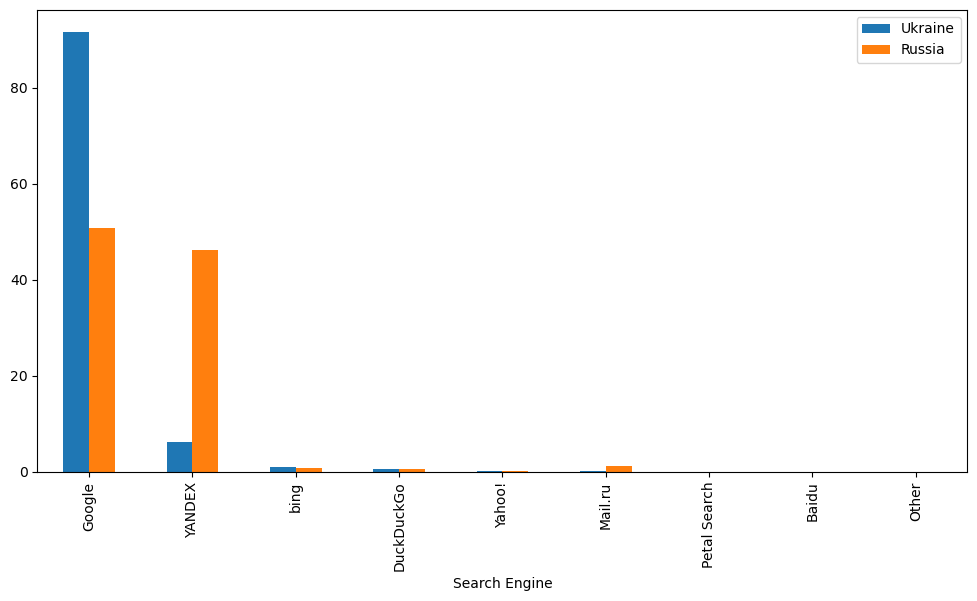

In [2]:
# Buscadores más usados
se_uk = pd.read_csv('buscadoruk.csv', index_col=['Search Engine'])
se_ru = pd.read_csv('buscadorru.csv', index_col=['Search Engine'])
se_ukru = pd.merge(se_uk, se_ru, on='Search Engine')
se_ukru.rename(columns={'Market Share Perc. (July 2021 - Oct 2022)_x': 'Ukraine', 'Market Share Perc. (July 2021 - Oct 2022)_y': 'Russia'}, inplace=True)
se_ukru.plot(kind='bar', figsize=(12,6));


In [3]:
# Comida
comida = pd.read_csv('comida.csv', header=1, index_col=False)
comida['Semana'] = pd.to_datetime(comida['Semana'], yearfirst=True)
comida.set_index(['Semana'], inplace=True)
comida.rename(columns={'еда: (Ucrania)': 'Russian (еда)', 'їжа: (Ucrania)': 'Ukrainian (їжа)'}, inplace=True)
fig = px.line(comida, title= '"Food" searches')
fig.show()

In [4]:
# Noticias
news = pd.read_csv('noticias.csv', header=1, index_col=['Mes'])
news.index = pd.to_datetime(news.index)
news.rename(columns={'новости: (Ucrania)': 'Russian (новости)', 'новини: (Ucrania)': 'Ukrainian (новини)'}, inplace=True)
news.head()
fig = px.line(news, title='News')
fig.show()

In [5]:
#Búsqueda de guerra
war = pd.read_csv('guerra.csv',header=1, index_col=['Mes'])
war.index = pd.to_datetime(war.index)
war.rename(columns={'война: (Ucrania)': 'Russian (война)', 'війна: (Ucrania)': 'Ukrainian (війна)'}, inplace=True)

fig = px.line(war, title='"War" searches in Google')
fig.show()

In [6]:
# Trabajo
work = pd.read_csv('trabajotiempo.csv', header=1, index_col=['Semana'])
work.rename(columns= {'работа: (Ucrania)': 'Russian (работа)', 'робота: (Ucrania)': 'Ukrainian (робота)'})
fig = px.line(work, title='Work searches in Google')
fig.show()

In [8]:
# Uso de Ruso y ucraniano por región
idioma = pd.read_csv('geoidiomas2.csv', header=1)
idioma.rename(columns={'переводчик: (10/30/21 - 10/30/22)': 'переводчик (Russian)', 'перекладач: (10/30/21 - 10/30/22)': 'перекладач (Ukrainian)'}, inplace=True)

import json

with open('newukmap.json') as r:
    mapa = json.load(r)

for i in mapa['features']:
    i['id'] = i['properties']['name:en']


# Initialize the map:
m = folium.Map(location=[49.297,32.080], zoom_start = 5, tiles='cartodbpositron')
 
# Add the color for the chloropleth:
folium.Choropleth(
 geo_data= mapa,
 name='choropleth',
 data=idioma.iloc[:,:-1],
 columns=['Region', 'переводчик (Russian)'],
 key_on='feature.id', 
 
 fill_color='PuBu',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Russian use of language based in searches'
).add_to(m)
folium.LayerControl().add_to(m)

m


In [ ]:
# A domicilio / Restaurantes
restaurant = pd.read_csv('restauracion.csv', header=1, index_col=['Semana'])
restaurant.rename({'доставка: (Ucrania)': 'Russian (доставка)', 'ресторан: (Ucrania)': 'Ukrainian (ресторан)'})
fig = px.line(restaurant, title='"Delivery/Restaurants" searches in Google')
fig.show()

In [ ]:
# Comprar maleta
maleta = pd.read_csv('maletatiempo.csv', header=1, index_col=['Semana'])
fig = go.Figure(go.Scatter(x=maleta.index, y=maleta['купить чемодан: (Ucrania)'], fill="toself"))
fig.update_layout(
    title="Buy suitcase (купить чемодан)")

fig.show()


In [ ]:
# Películas / Juegos
online = pd.read_csv('online.csv', header=1, index_col='Semana')
online.rename(columns={'смотреть онлайн: (Ucrania)': 'Watch online (смотреть онлайн)', 'игры: (Ucrania)': 'Games (игры)'}, inplace=True)
pelis = pd.read_csv('pelis.csv', header=1, index_col='Semana')
pelis.rename(columns={'кино: (Ucrania)': 'Cinema (кино)', 'Нетфликс: (Ucrania)': 'Netflix (Нетфликс)'}, inplace=True)
online_merge = pd.merge(online, pelis, on='Semana')
fig = px.line(online_merge, title='Audiovisual content trends')
fig.show()

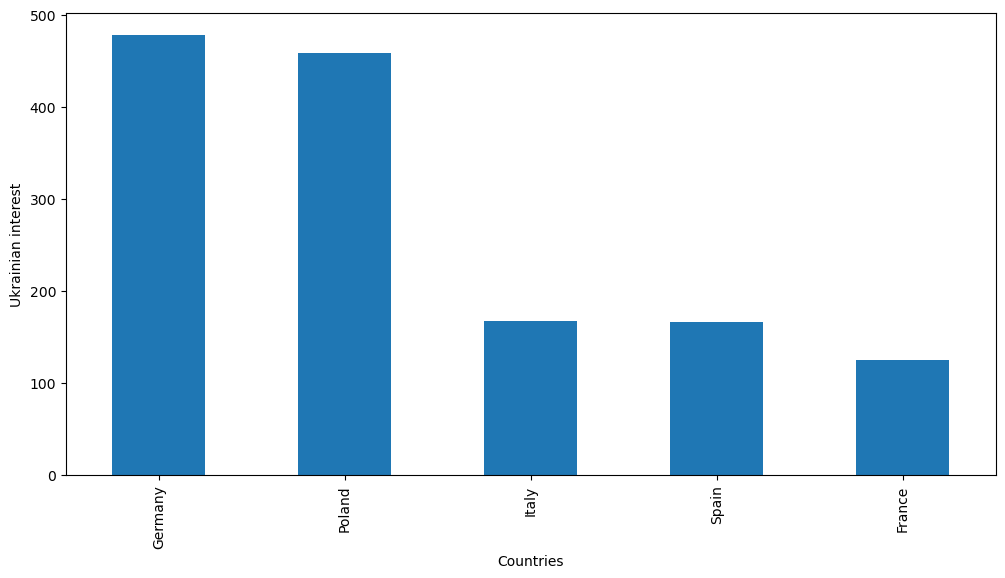

In [ ]:
# Lugares de Interés en Europa
refugio = pd.read_csv('interesrefugio.csv', header=1)
refugio.rename(columns={'Германия беженцы: (Ucrania)': 'Germany', 
                        'Польша беженцы: (Ucrania)': 'Poland', 
                        'Италия беженцы: (Ucrania)': 'Italy', 
                        'Испании беженцы: (Ucrania)': 'Spain', 
                        'Франция беженцы: (Ucrania)': 'France'}, 
                        inplace=True)
refugio.sum()[1:].plot(figsize=(12,6),kind='bar', xlabel='Countries', ylabel='Ukrainian interest');

In [ ]:
# Mapa de las búsquedas en ruso en España

# Búsquedas en ruso (código)
rusosespana = pd.read_csv('geoespanarus.csv', header=1)
rusosespana.rename(columns={'переводчик: (2/11/20 - 2/11/22)': 'Translator (переводчик)'}, inplace=True)
rusosespana.head()
# Mapa
import json

with open('geoespana.geojson') as r:
    mapa = json.load(r)
# id obligatorio en el json
for i in mapa['features']:
    i['id'] = i['properties']['acom_name']
# lista de Autonomias que tienen que coincidir con el csv
autonomias = []
mapa['features'][0]['properties']['acom_name']
for i in mapa['features']:
    autonomias.append(i['properties']['acom_name'])

# Mapa
m = folium.Map(location=[40.1257, -4], zoom_start = 6, tiles='cartodbpositron')

 
# Add the color for the chloropleth:
folium.Choropleth(
 geo_data=mapa,
 name='choropleth',
 data=rusosespana,
 columns=['Región', 'Translator (переводчик)'],
 key_on='feature.id',  
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Russian language searches in Spain'
).add_to(m)
folium.LayerControl().add_to(m)
m



In [ ]:
# Búsquedas en ucraniano en España
ukespana = pd.read_csv('geoespanauk.csv', header=1)
ukespana.rename(columns={'перекладач: (2/11/20 - 2/11/22)': 'Translator (перекладач)'}, inplace=True)
ukespana.head()
# Mapa
import json

with open('geoespana.geojson') as r:
    mapa = json.load(r)
# id obligatorio en el json
for i in mapa['features']:
    i['id'] = i['properties']['acom_name']
# lista de Autonomias que tienen que coincidir con el csv
autonomias = []
mapa['features'][0]['properties']['acom_name']
for i in mapa['features']:
    autonomias.append(i['properties']['acom_name'])

# Initialize the map:
m = folium.Map(location=[40.1257, -4], zoom_start = 6, tiles='cartodbpositron')

 
# Add the color for the chloropleth:
folium.Choropleth(
 geo_data=mapa,
 name='choropleth',
 data=ukespana,
 columns=['Región', 'Translator (перекладач)'],
 key_on='feature.id',  
 fill_color='YlGnBu',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Ukrainian language searches in Spain'
).add_to(m)
folium.LayerControl().add_to(m)
m

In [ ]:
busquedasespana = pd.read_csv('busquedasespana.csv', header=1, index_col='Semana')
busquedasespana.index = pd.to_datetime(busquedasespana.index)
busquedasespana.rename(columns={'переводчик: (España)': 'переводчик', 'перекладач: (España)': 'перекладач'})
busquedasespana.head()

fig = px.line(busquedasespana, title='Russian/Ukrainian searches in Spain')
fig.show()


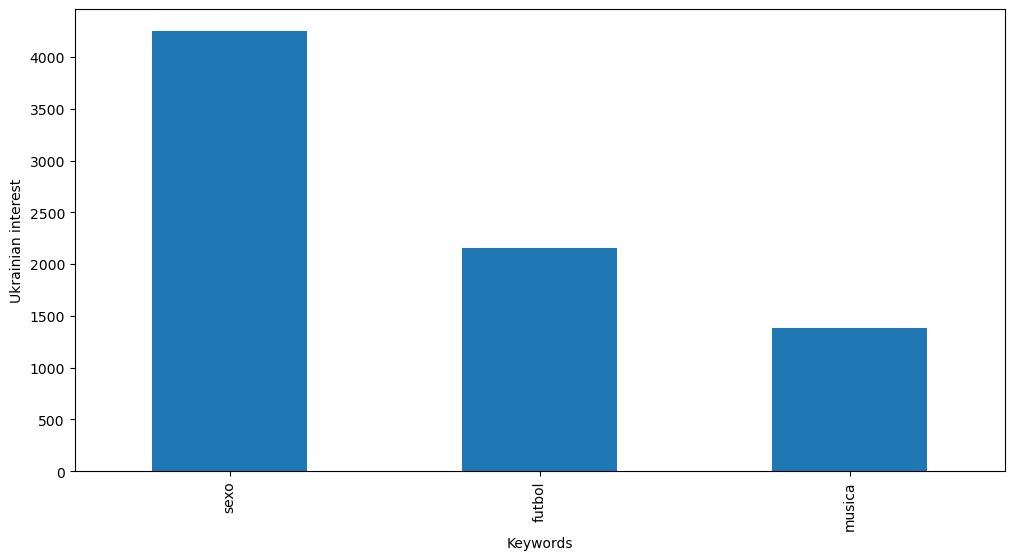

In [ ]:
sexuk = pd.read_csv('sexuk.csv', header=1)
sexuk.rename(columns= {'секс: (Ukraine)': 'sexo', 'футбол: (Ukraine)': 'futbol', 'Музыка: (Ukraine)': 'musica'},inplace=True)

sexuk.sum()[1:].plot(figsize=(12,6),kind='bar', xlabel='Keywords', ylabel='Ukrainian interest');

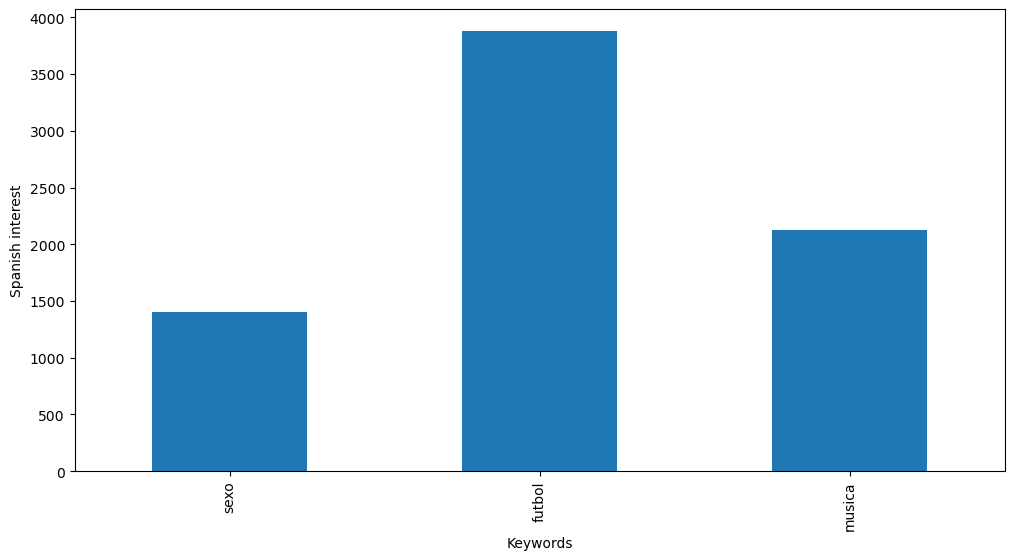

In [ ]:
sexesp = pd.read_csv('sexesp.csv', header=1)
sexesp.rename(columns= {'sexo: (Spain)': 'sexo', 'futbol: (Spain)': 'futbol', 'musica: (Spain)': 'musica'},inplace=True)

sexesp.sum()[1:].plot(figsize=(12,6),kind='bar', xlabel='Keywords', ylabel='Spanish interest');